In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("fifa.csv")

In [3]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [25]:
#Function to convert value and wage of the player.
def currencyConverter(val):
    if val[-1] == 'M':
        val = val[1:-1]
        val = float(val) * 1000000
        return val
        
    elif val[-1] == 'K':
        val = val[1:-1]
        val = float(val) * 1000
        return val
    
    else:
        return 0

In [6]:
df['Value']=df['Value'].str.replace('€','')
df['Value']=df['Value'].str.replace('M','')
df['Value']=df['Value'].str.replace('K','')

In [7]:
df['Wage']=df['Wage'].str.replace('€','')
df['Wage']=df['Wage'].str.replace('K','')
df.Wage.astype(dtype=np.float64)

0        565.0
1        405.0
2        290.0
3        260.0
4        355.0
5        340.0
6        420.0
7        455.0
8        380.0
9         94.0
10       205.0
11       355.0
12       125.0
13       285.0
14       225.0
15       205.0
16       205.0
17       145.0
18       240.0
19       240.0
20       315.0
21       200.0
22       130.0
23       300.0
24       215.0
25       100.0
26       255.0
27       285.0
28       315.0
29       165.0
         ...  
18177      1.0
18178      1.0
18179      1.0
18180      1.0
18181      1.0
18182      1.0
18183      1.0
18184      1.0
18185      1.0
18186      1.0
18187      1.0
18188      1.0
18189      1.0
18190      1.0
18191      1.0
18192      1.0
18193      1.0
18194      1.0
18195      1.0
18196      1.0
18197      1.0
18198      1.0
18199      1.0
18200      1.0
18201      1.0
18202      1.0
18203      1.0
18204      1.0
18205      1.0
18206      1.0
Name: Wage, Length: 18207, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

In [9]:
df['Joined'] = pd.DatetimeIndex(df['Joined']).year

In [10]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [11]:
df['Weight']=df['Weight'].str.replace('lbs','').astype(dtype=np.float64)


In [12]:
df['Height']=df['Height'].str.replace("'",'').astype(dtype=np.float64)

In [13]:
df['Release Clause']=df['Release Clause'].astype(dtype=np.str)

In [14]:
df['Release Clause']=df['Release Clause'].str.replace('€','')
df['Release Clause']=df['Release Clause'].str.replace('M','')
df['Release Clause']=df['Release Clause'].str.replace('K','')

In [15]:
df.fillna(0, inplace=True)

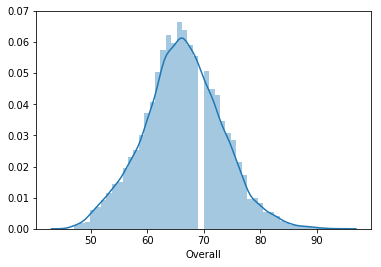

In [16]:
#1.Plot the distribution of Overall rating for all players. 

sns.distplot(df['Overall']);

In [17]:
#3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
d2 = pd.DataFrame(df, columns=['Name', 'Age', 'Potential', 'Nationality','Contract Valid Until', 'Overall','Wage'])
d3=d2.sort_values(by='Overall', ascending=False).head(20)
d3

,Name,Age,Potential,Nationality,Contract Valid Until,Overall,Wage
0,L. Messi,31,94,Argentina,2021-01-01 00:00:00,94,565
1,Cristiano Ronaldo,33,94,Portugal,2022-01-01 00:00:00,94,405
2,Neymar Jr,26,93,Brazil,2022-01-01 00:00:00,92,290
3,De Gea,27,93,Spain,2020-01-01 00:00:00,91,260
4,K. De Bruyne,27,92,Belgium,2023-01-01 00:00:00,91,355
5,E. Hazard,27,91,Belgium,2020-01-01 00:00:00,91,340
6,L. Modrić,32,91,Croatia,2020-01-01 00:00:00,91,420
7,L. Suárez,31,91,Uruguay,2021-01-01 00:00:00,91,455
8,Sergio Ramos,32,91,Spain,2020-01-01 00:00:00,91,380
12,D. Godín,32,90,Uruguay,2019-01-01 00:00:00,90,125


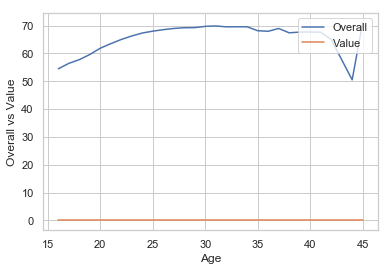

In [75]:
p= sns.lineplot(x = 'Age', y = 'Overall', ci = None, data = df, label = 'Overall')
p = sns.lineplot(x = 'Age', y = 'Value in Pounds', ci = None, data = df, label = 'Value')
p = plt.ylabel('Overall vs Value')
p = plt.legend(loc = 1)


In [ ]:
#2.	Generate pair plots for the following variables:
#Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
d2=df[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']]


In [ ]:
import seaborn as sns
sns.pairplot(d2)
plt.show()

Text(0.5, 1.0, 'Count of players on the position')

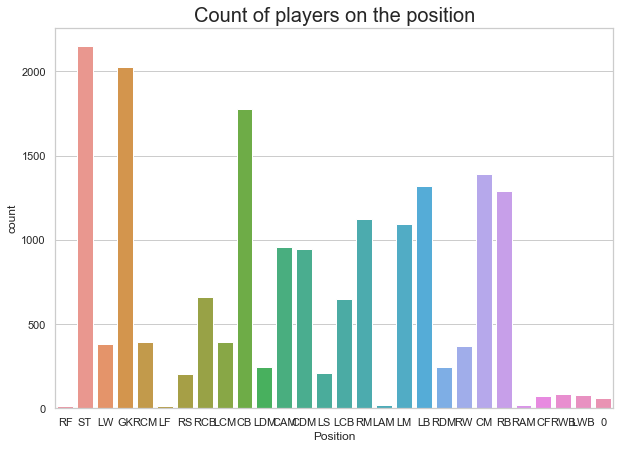

In [24]:
plt.figure(figsize = (10,7))
sns.set(style="whitegrid")
ax = sns.countplot(x = 'Position' ,data = df) 
# countplot is use for showing the counts of observations in each categorical bin using bars.
ax.set_title(label='Count of players on the position', fontsize=20)

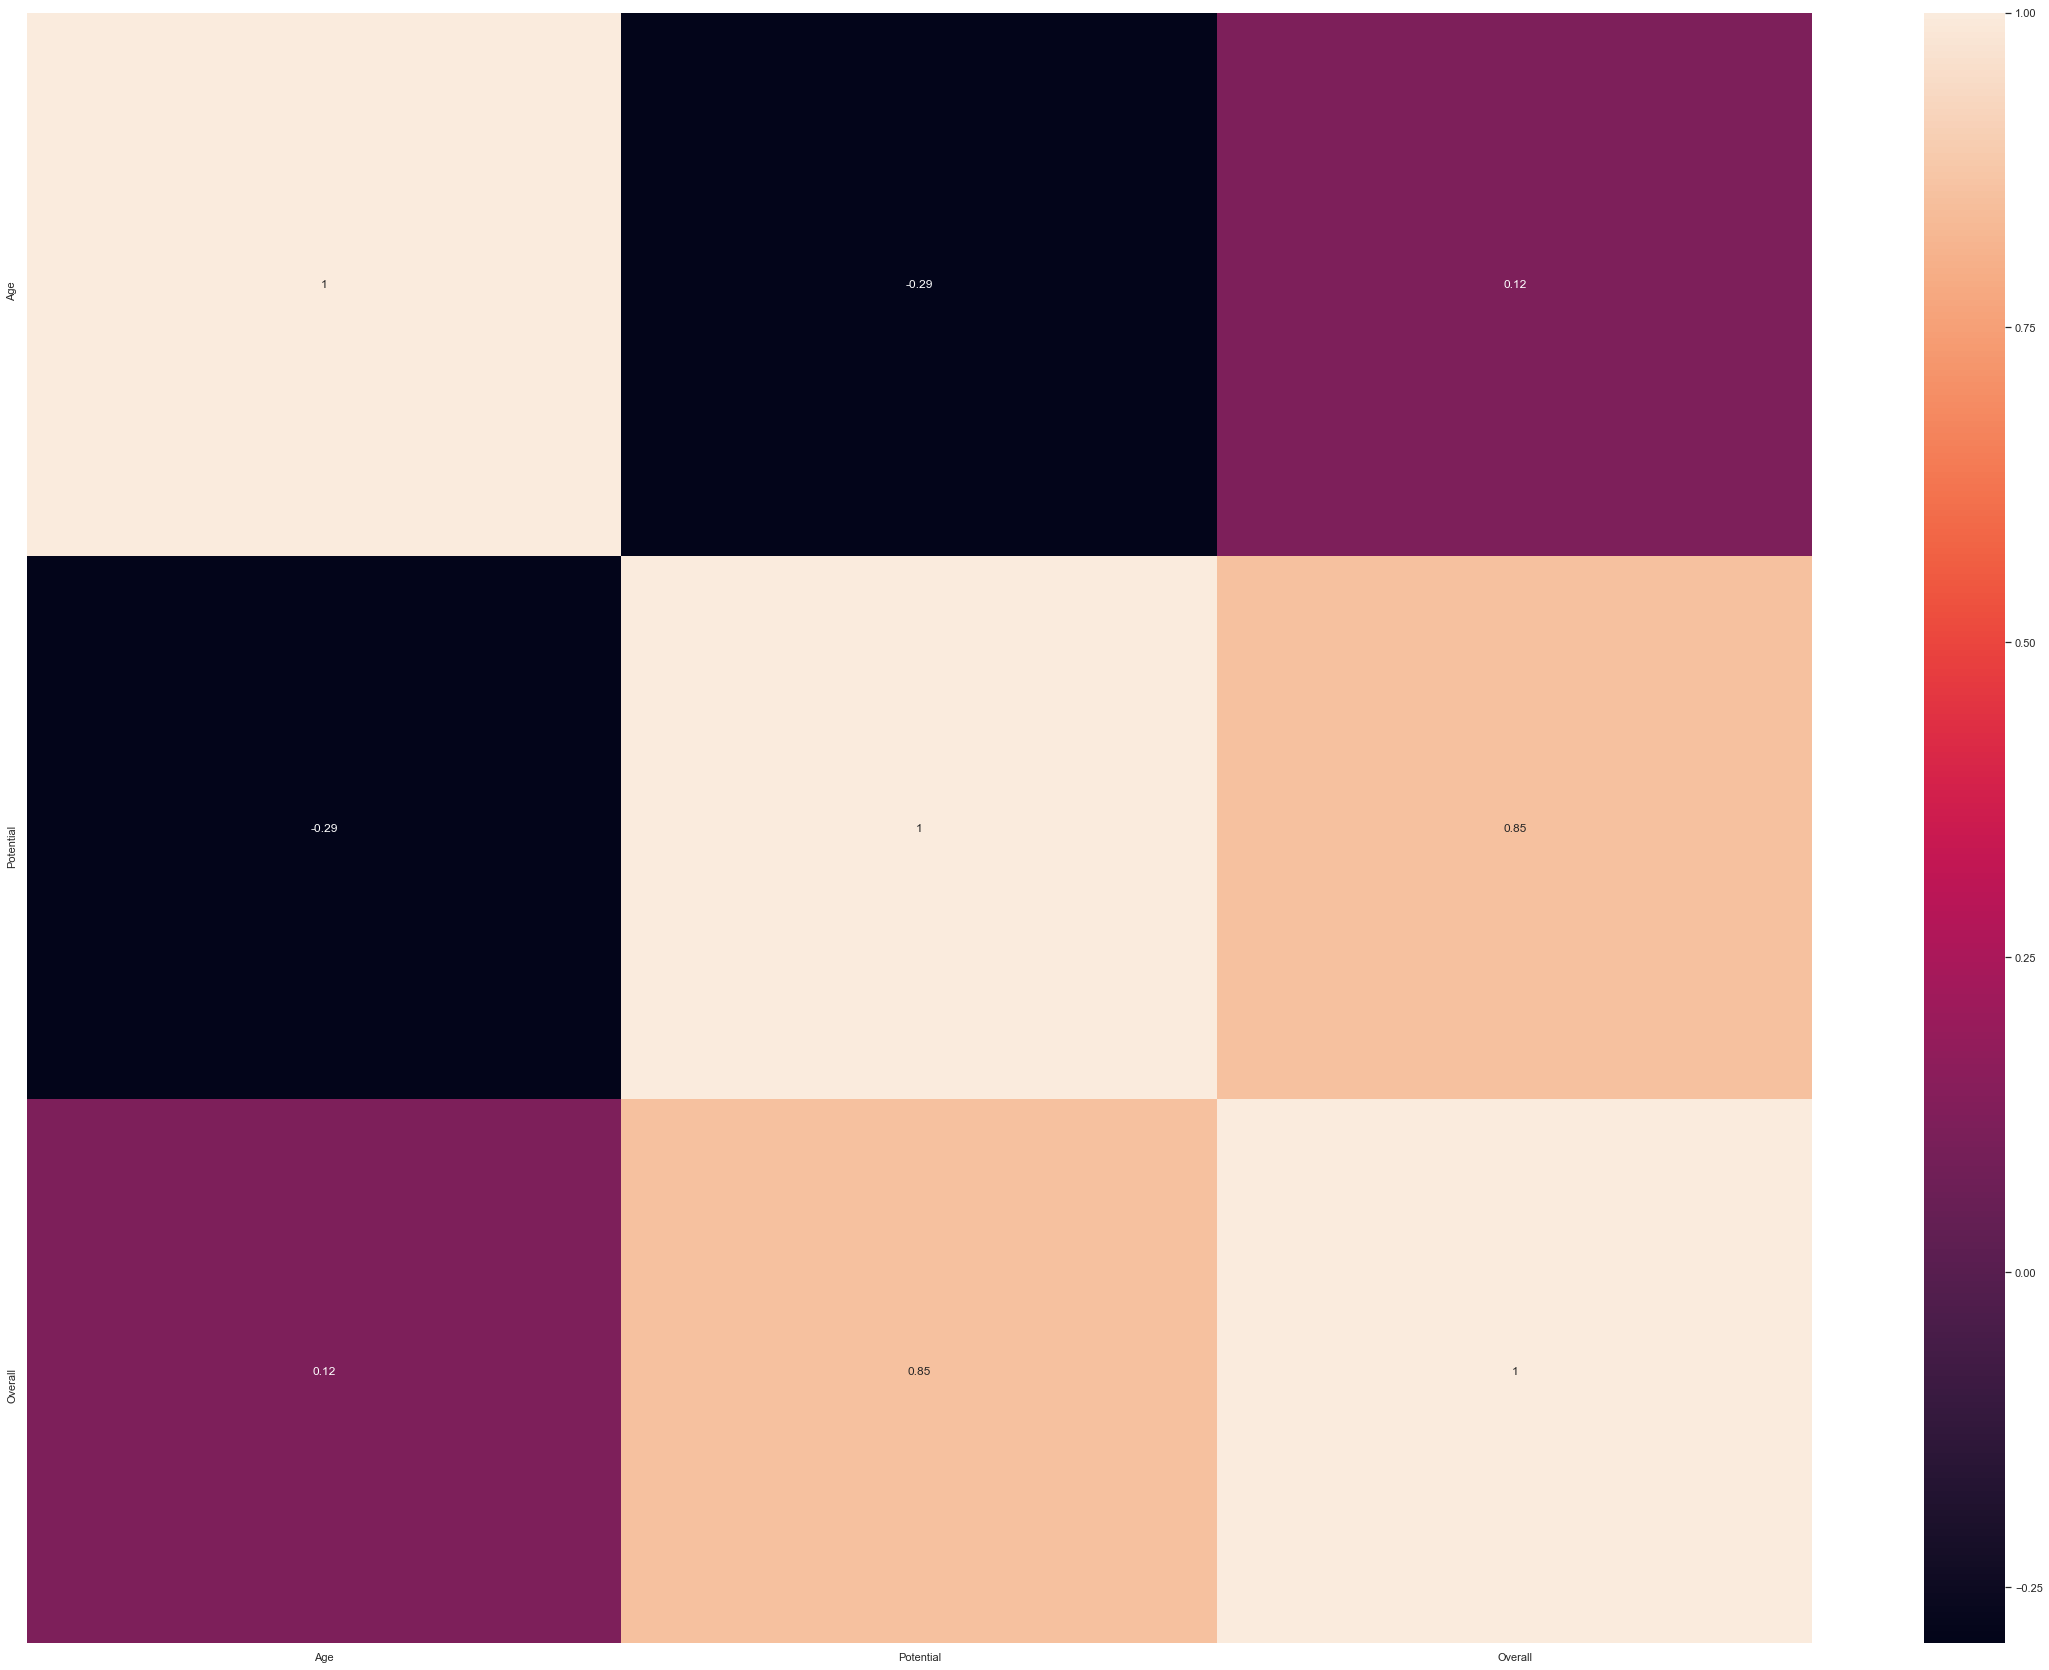

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,30))
p = sns.heatmap(d3.corr(), annot=True)

In [20]:
#4.Generate tables containing the top 5 players by Overall rating for each unique position.


d4=df['Position'].unique()
d4

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', 0], dtype=object)

In [23]:
d5=display((df.iloc[df.groupby(df['Position'])['Overall'].idxmax(5)][['Name', 'Position']]))

,Name,Position
5018,R. Raldes,0
17,A. Griezmann,CAM
12,D. Godín,CB
20,Sergio Busquets,CDM
271,Luis Alberto,CF
67,Thiago,CM
3,De Gea,GK
28,J. Rodríguez,LAM
35,Marcelo,LB
24,G. Chiellini,LCB
